In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']= 14,8
RANDOM_SEED= 42
LABELS=["Normal","Fraud"]
from sklearn.base  import clone

In [32]:
df= pd.read_csv("D:/Deep Learning with Keras and Tensorflow Recording/loan_data (1).csv")

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(307511, 122)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
df.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
df.dropna(how='any',axis=1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,Working,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,Pensioner,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,Working,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df[df['AMT_REQ_CREDIT_BUREAU_DAY'].notnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Create Independent and Dependent Features
columns = df.columns.tolist()
# Filter the columnsa to remove data we do not want
columns = [c for c in columns if c not in["AMT_REQ_CREDIT_BUREAU_YEAR"]]
# Store the  variable we are predicting
target = "AMT_REQ_CREDIT_BUREAU_YEAR"
# Define a randam State
state = np.random.RandomState(42)
X = df[columns]
y = df["TARGET"]
X_outliers = state.uniform(low = 0, high = 1, size=(X.shape[0],X.shape[1]))

print(X.shape)
print(y.shape)

(307511, 121)
(307511,)


In [34]:
df.isnull().values.any()

True

Text(0, 0.5, 'TARGET')

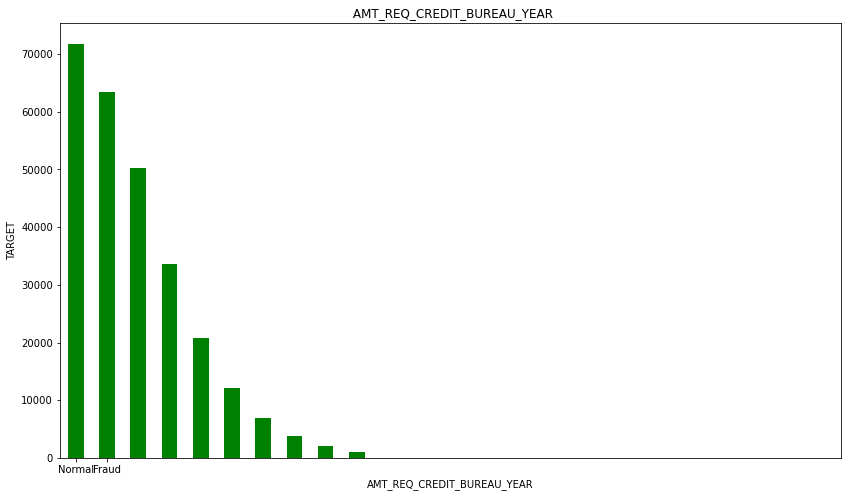

In [8]:
count_AMT_REQ_CREDIT_BUREAU_YEAR= pd.value_counts(df['AMT_REQ_CREDIT_BUREAU_YEAR'],sort =True)
count_AMT_REQ_CREDIT_BUREAU_YEAR.plot(kind ='bar',color ='g',rot =0)
plt.title(" AMT_REQ_CREDIT_BUREAU_YEAR")

plt.xticks(range(2),LABELS)
plt.xlabel("AMT_REQ_CREDIT_BUREAU_YEAR")
plt.ylabel("TARGET")

In [12]:
## Get the Fraud and the normal dataset
fraud = df[df['TARGET']==1]
normal = df[df['TARGET']==0]  

In [13]:
print(fraud.shape,normal.shape)

(24825, 122) (282686, 122)


In [14]:
from imblearn.under_sampling import NearMiss

In [15]:
from imblearn import under_sampling, over_sampling

In [ ]:
!pip3 install imblearn

In [35]:
# Implementing Undersampling for Handling Imbalanced
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

In [36]:
X_res.shape,y_res.shape

((49650, 121), (49650,))

In [37]:
from collections  import Counter

In [38]:
print('Original df shape()',format(Counter(y)))
print('Resampled df shape()',format(Counter(y_res)))

Original df shape() Counter({0: 282686, 1: 24825})
Resampled df shape() Counter({0: 24825, 1: 24825})


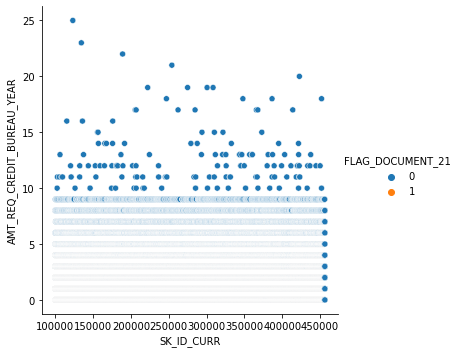

In [17]:
sns.relplot(x="SK_ID_CURR",y="AMT_REQ_CREDIT_BUREAU_YEAR",hue="FLAG_DOCUMENT_21",data= df)

In [39]:
x =df.drop(['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE',
            'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE'],axis=1)

In [40]:
df.dropna(how ='any',axis=1, inplace=True)

In [50]:
x.dropna(how='any',axis=1,inplace=True)

In [51]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((246008, 45), (61503, 45), (246008,), (61503,))

In [53]:
x

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,0.003541,-16765,-1188,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,0.032561,-9327,-236,-8456.0,-1982,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,72000.0,269550.0,0.025164,-20775,365243,-4388.0,-4090,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,153000.0,677664.0,0.005002,-14966,-7921,-6737.0,-5150,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,171000.0,370107.0,0.005313,-11961,-4786,-2562.0,-931,...,0,0,0,0,0,0,0,0,0,0


In [83]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [84]:
pred=rfc.predict(x_test)

In [59]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[56554     0]
 [    0  4949]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56554
           1       1.00      1.00      1.00      4949

    accuracy                           1.00     61503
   macro avg       1.00      1.00      1.00     61503
weighted avg       1.00      1.00      1.00     61503

1.0


In [81]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,\
fbeta_score,matthews_corrcoef

In [60]:
from sklearn.preprocessing import OneHotEncoder
ohe= OneHotEncoder(sparse=False)

In [63]:
ohe.fit_transform(df[['NAME_CONTRACT_TYPE']])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [64]:
ohe.categories_

[array(['Cash loans', 'Revolving loans'], dtype=object)]

In [65]:
from sklearn.compose import make_column_transformer

In [71]:
column_trans= make_column_transformer(
(OneHotEncoder(),['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL']),remainder='passthrough')

In [72]:
column_trans.fit_transform(x)

<307511x2607 sparse matrix of type '<class 'numpy.float64'>'
	with 5498184 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.pipeline import make_pipeline
pipe= make_pipeline(column_trans, rfc)

In [77]:
from sklearn.model_selection import cross_val_score